In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


In [49]:
try:
    layer = tf.keras.layers.LSTM(units=50, return_sequences=True)
    print("tf.keras.models!")
except AttributeError as e:
    print(f"Error: {e}")

tf.keras.models!


In [50]:
price_gold = pd.read_csv('https://raw.githubusercontent.com/elm19/GoldSpot-Predictor/refs/heads/djeri/data/processed-data/price-gold.csv', index_col='Date')
print(price_gold.head())

lookback_period = 10
test_size = 0.2

data = price_gold[['Open', 'Close', 'High', 'Low', 'Vol.']].copy()
data = data.dropna()  # Handle potential missing values

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

             Close    Open    High     Low      Vol. Change %
Date                                                         
2015-01-02  1186.2  1184.0  1194.9  1167.3  120680.0    0.18%
2015-01-05  1204.0  1187.8  1207.5  1177.8  149110.0    1.50%
2015-01-06  1219.4  1204.0  1223.3  1201.6  190360.0    1.28%
2015-01-07  1210.7  1219.0  1219.4  1209.1  117090.0   -0.71%
2015-01-08  1208.5  1211.0  1216.8  1204.2  122490.0   -0.18%


In [51]:
def create_sequences(data, lookback):
        X, y = [], []
        for i in range(lookback, len(data)-6):
            X.append(data[i - lookback:i])
            y.append(data[i:i+6, 1])  # Predict the 'Close' price (index 1)
        return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, lookback_period)

# Split into training and testing sets
train_size = int(len(X) * (1 - test_size))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1840, 10, 5)
Shape of X_test: (460, 10, 5)
Shape of y_train: (1840, 6)
Shape of y_test: (460, 6)


In [52]:
model_LSTM = tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_LSTM.add(tf.keras.layers.LSTM(units=50))
model_LSTM.add(tf.keras.layers.Dense(units=6))  # Output layer to predict the next 'Close' price

model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

history_LSTM = model_LSTM.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 73s 11ms/step - loss: 0.0895
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0011
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0011
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 16/50
58

In [53]:
model_LSTM.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 10, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,120 (371.57 KB)

 Trainable params: 31,706 (123.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,414 (247.71 KB)

Plot de  loss


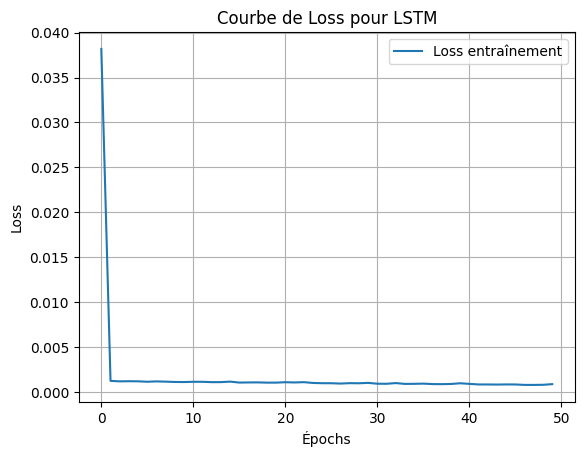

In [54]:
plt.plot(history_LSTM.history['loss'], label='Loss entraînement')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Courbe de Loss pour LSTM')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
LSTM_MSE = model_LSTM.evaluate(X_test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011


In [56]:
predicted_scaled = model_LSTM.predict(X_test)

# Inverse transform the predictions
predicted_prices = np.zeros((predicted_scaled.shape[0], predicted_scaled.shape[1]))
for i in range(predicted_scaled.shape[1]):
    dummy_predictions = np.zeros((len(predicted_scaled), 5))
    dummy_predictions[:, 1] = predicted_scaled[:, i]
    predicted_prices[:, i] = scaler.inverse_transform(dummy_predictions)[:, 1]

# Get the actual 'Close' prices from the test set
test_start_index = int(len(data) * (1 - test_size))+lookback_period
actual_close_test = data['Close'].iloc[test_start_index:]
num_test_samples = predicted_prices.shape[0]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


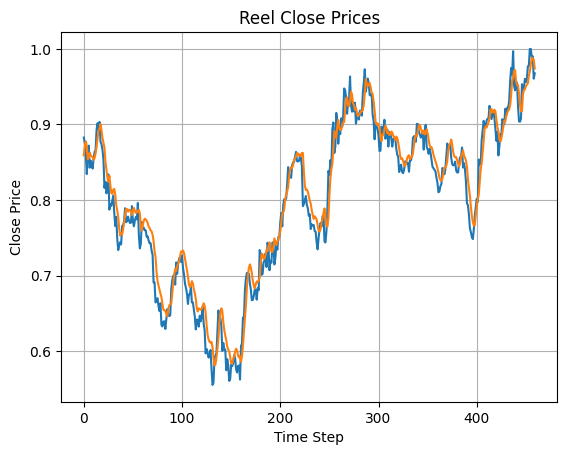

In [57]:
reel_prices = [y_test[i, 0] for i in range(y_test.shape[0])]
reel_prices = np.array(reel_prices)
plt.plot(reel_prices)
plt.plot([predicted_scaled[i, 0] for i in range(len(predicted_scaled)) ])
plt.title('Reel Close Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.grid(True)

plt.show()

RNN

In [58]:
model_RNN = tf.keras.models.Sequential()
model_RNN.add(tf.keras.layers.SimpleRNN(units=50,activation = "tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_RNN.add(tf.keras.layers.SimpleRNN(units=50))
model_RNN.add(tf.keras.layers.Dense(units=6))  # Output layer to predict the next 'Close' price

# 3. Compile the model
Adam=tf.keras.optimizers.Adam(learning_rate=0.04)
model_RNN.compile(optimizer='adam', loss='mean_squared_error')

model_RNN.compile(optimizer = Adam,
                  loss = "mean_squared_error",
                  metrics=['mae'])

# 4. Train the model
history_RNN= model_RNN.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)



model_RNN.summary()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.8359 - mae: 0.6558
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0644 - mae: 0.2153
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0047 - mae: 0.0539
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - mae: 0.0551
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mae: 0.0783
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mae: 0.0408
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mae: 0.0545
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mae: 0.0491
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mae: 0.0593
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mae: 0.0786
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - mae: 0.0784
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mae: 0.0605
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss:

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 10, 50)              │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,470 (95.59 KB)

 Trainable params: 8,156 (31.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,314 (63.73 KB)

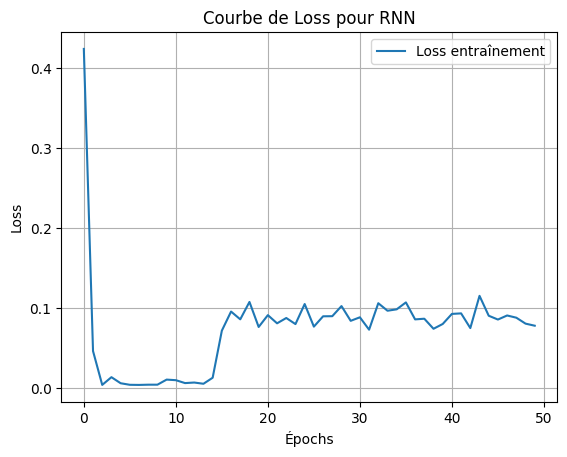

In [59]:
plt.plot(history_RNN.history['loss'], label='Loss entraînement')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Courbe de Loss pour RNN')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
RNN_MSE = model_RNN.evaluate(X_test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2094 - mae: 0.4467


In [61]:
y_predicted_scaled_RNN=model_RNN.predict(X_test)

# Inverse transform the predictions
y_predicted_scaled_RNN = np.zeros((predicted_scaled.shape[0], predicted_scaled.shape[1]))
for i in range(predicted_scaled.shape[1]):
    dummy_predictions = np.zeros((len(predicted_scaled), 5))
    dummy_predictions[:, 1] = predicted_scaled[:, i]
    y_predicted_scaled_RNN[:, i] = scaler.inverse_transform(dummy_predictions)[:, 1]

# Get the actual 'Close' prices from the test set
test_start_index = int(len(data) * (1 - test_size))+lookback_period
actual_close_test = data['Close'].iloc[test_start_index:]
num_test_samples = y_predicted_scaled_RNN.shape[0]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


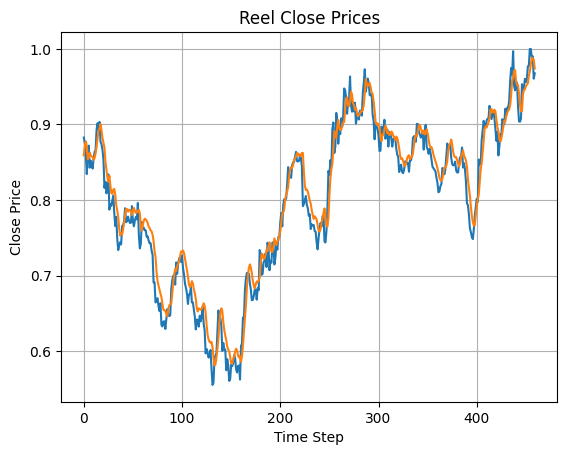

In [62]:
reel_prices = [y_test[i, 0] for i in range(y_test.shape[0])]
reel_prices = np.array(reel_prices)
plt.plot(reel_prices)
plt.plot([predicted_scaled[i, 0] for i in range(len(predicted_scaled)) ])
plt.title('Reel Close Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.grid(True)

plt.show()

GRU

In [63]:
model_GRU = tf.keras.models.Sequential()
model_GRU.add(tf.keras.layers.GRU(units=50,activation = "tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_GRU.add(tf.keras.layers.GRU(units=32))
model_GRU.add(tf.keras.layers.Dense(units=6))  # Output layer to predict the next 'Close' price

# 3. Compile the model
Adam=tf.keras.optimizers.Adam(learning_rate=0.04)
model_GRU.compile(optimizer='adam', loss='mean_squared_error')

model_GRU.compile(optimizer = Adam,
                  loss = "mean_squared_error",
                  metrics=['mae'])

# 4. Train the model

history_GRU= model_GRU.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

model_GRU.summary()



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1232 - mae: 0.2108
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.6970e-04 - mae: 0.0224
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 8.5439e-04 - mae: 0.0213
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0010 - mae: 0.0234
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.3056e-04 - mae: 0.0209
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - mae: 0.0251
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.1691e-04 - mae: 0.0203
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.7619e-04 - mae: 0.0204
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.7240e-04 - mae: 0.0218
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.2090e-04 - mae: 0.0220
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.6713e-04 - mae: 0.0215
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.6417e-04 - mae: 0.0204
Epoch 13/50


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 10, 50)              │           8,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,438 (197.03 KB)

 Trainable params: 16,812 (65.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,626 (131.36 KB)

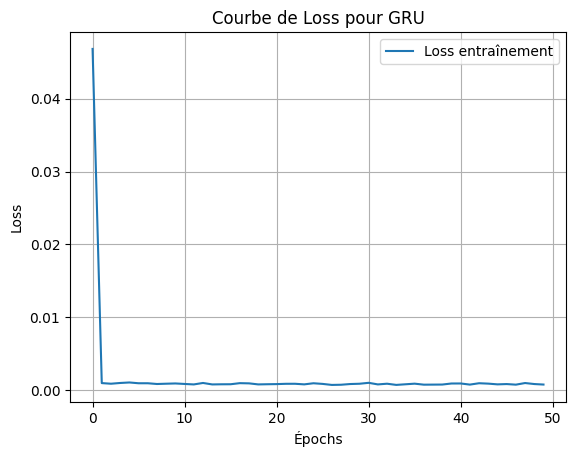

In [64]:
plt.plot(history_GRU.history['loss'], label='Loss entraînement')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Courbe de Loss pour GRU')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
GRU_MSE = model_GRU.evaluate(X_test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - mae: 0.0259   


In [66]:
y_predicted_scaled_GRU = model_GRU.predict(X_test)

# Inverse transform the predictions
y_predicted_scaled_GRU = np.zeros((predicted_scaled.shape[0], predicted_scaled.shape[1]))
for i in range(predicted_scaled.shape[1]):
    dummy_predictions = np.zeros((len(predicted_scaled), 5))
    dummy_predictions[:, 1] = predicted_scaled[:, i]
    y_predicted_scaled_GRU[:, i] = scaler.inverse_transform(dummy_predictions)[:, 1]

# Get the actual 'Close' prices from the test set
test_start_index = int(len(data) * (1 - test_size))+lookback_period
actual_close_test = data['Close'].iloc[test_start_index:]
num_test_samples = y_predicted_scaled_GRU.shape[0]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


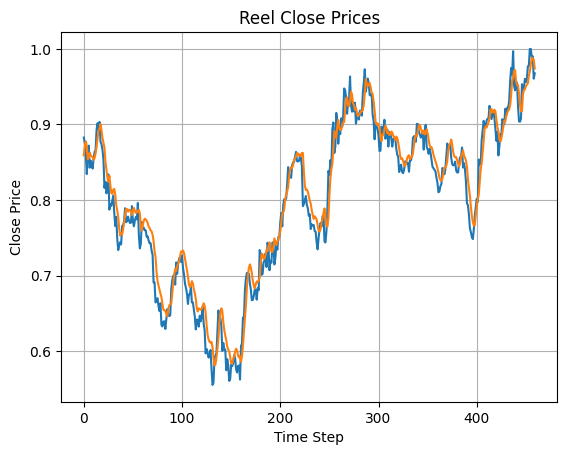

In [67]:
reel_prices = [y_test[i, 0] for i in range(y_test.shape[0])]
reel_prices = np.array(reel_prices)
plt.plot(reel_prices)
plt.plot([predicted_scaled[i, 0] for i in range(len(predicted_scaled)) ])
plt.title('Reel Close Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.grid(True)

plt.show()

In [68]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model_GRU.fit(X_train, y_train, epochs=50,
          callbacks=[tensorboard_callback])

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011 - mae: 0.0247
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0010 - mae: 0.0231
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.3558e-04 - mae: 0.0180
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.7885e-04 - mae: 0.0207
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.9715e-04 - mae: 0.0189
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.5979e-04 - mae: 0.0196
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0010 - mae: 0.0237
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.0308e-04 - mae: 0.0207
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.7756e-04 - mae: 0.0189
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.6520e-04 - mae: 0.0203
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.9114e-04 - mae: 0.0191
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.1498e-04 - mae: 0.0216
E

for collab

In [69]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit


for terminal


In [70]:
# !tensorboard --logdir=logs/fit

In [71]:
print("LSTM MSE:", LSTM_MSE)
print("RNN MSE:", RNN_MSE)
print("GRU MSE:", GRU_MSE)

LSTM MSE: 0.0011591371148824692
RNN MSE: [0.24319851398468018, 0.48118120431900024]
GRU MSE: [0.0014209664659574628, 0.029521886259317398]
